In [2]:
import pandas as pd
df = pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
X= df.iloc[:,0:1]
y =df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)


In [5]:
X_train

,TV
137,273.7
163,163.5
111,241.7
123,123.1
109,255.4
...,...
43,206.9
22,13.2
72,26.8
15,195.4


In [6]:
import numpy as np
predictions = []
def predict(data,w,b):
    prediction =[w*x+b for x in data['TV']]
    predictions = np.array(prediction)
    return prediction


def improve(cost,w,b):
    lr=0.1
    for i in range(1000):
        #decrease value of w and b if cost is negative else increase both
        w += lr*cost
        b += lr*cost
        
        prediction =predict(X_train,w,b)
        cost  = calculate_cost(y_train,prediction)
    return (cost,w,b)
    
def calculate_cost(ya,yp):
    error = [ya-yp for ya,yp in zip(ya,yp)]
    cost = sum(error)/len(ya)
    return cost
def fit_model(X_train,y_train,w,b):
    
    prediction = predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    print(cost) 
    cost,w,b = improve(cost,w,b)
    prediction =predict(X_test,w,b)
    cost  = calculate_cost(y_train,prediction)
    print(prediction)
    print(cost,w,b)



fit_model(X_train,y_train,0,0)

    


-130.728125
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
nan nan nan


# cost is negative (-3.9859) when w=1,b=0
# cost is negative (-5.3839875) when w=1.2,b=0
# cost is negative (-5.8839875) when w=1.2,b=0.5
# conclusion so by increasing value of w and b error increased in negative side , move toward negative side
# cost is posiutive (1.10595) when w=0.2,b=0.5
# cost is positive (1.40595) when w=0.2,b=0.2
# conclusion by decreasing value of w and b the error moved towards positive side /


ValueError: x and y must have same first dimension, but have shapes (40, 1) and (0,)

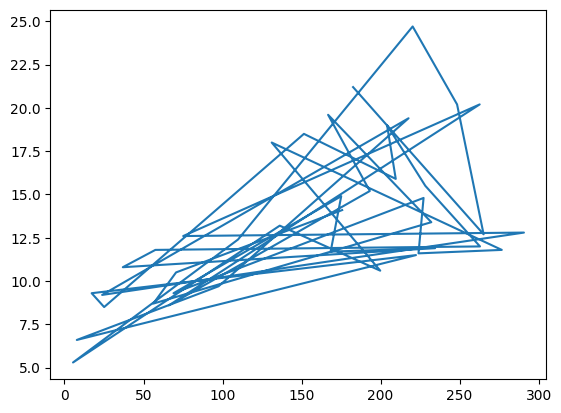

In [7]:
import matplotlib.pyplot as plt
plt.plot(X_test,y_test)
plt.plot(X_test,predictions)